In [0]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, RobustScaler
from collections import Counter

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/My Drive/InterIIT/Data.csv')

In [0]:
df.Remarks.value_counts()

Issues with the Manager                           145
Lack of Growth                                     96
More Challenging Job Roles/ Higher designation     31
Better Salary                                      19
Termination - Poor Performance                     13
Absconding                                          8
Termination - Theft                                 6
Health Reasons                                      4
Higher education                                    3
Reasons not known                                   2
Name: Remarks, dtype: int64

In [0]:
df=df.dropna()

In [0]:
df=df.reset_index()

In [0]:
df['Zone']=df['Zone'].apply(lambda x: x.lower())

In [0]:
company_data=df

In [0]:
eng_score=list(df['Engagement Score (% Satisfaction)'])
satisfaction=[]
for x in eng_score:
  satisfaction.append(int(x[:-1]))
df['satisfaction']=pd.Series(satisfaction)

In [0]:
grade=df['Grade']

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['Grade'])
df['Grade']=pd.Series(le.transform(df['Grade']))
le=LabelEncoder()
le.fit(df['Location'])
df['Location']=pd.Series(le.transform(df['Location']))
le=LabelEncoder()
le.fit(df['Gender'])
df['Gender']=pd.Series(le.transform(df['Gender']))
le=LabelEncoder()
le.fit(df['Marital Status'])
df['Marital Status']=pd.Series(le.transform(df['Marital Status']))
le=LabelEncoder()
le.fit(df['Zone'])
df['Zone']=pd.Series(le.transform(df['Zone']))
le=LabelEncoder()
le.fit(df['Education'])
df['Education']=pd.Series(le.transform(df['Education']))
le=LabelEncoder()
le.fit(df['Remarks'])
df['Remarks']=pd.Series(le.transform(df['Remarks']))

In [0]:
income_list=list(df['Monthly Income'])
designation_list=list(grade)
income_percent=[]
for i in range(len(income_list)):
  income=income_list[i]
  designation=designation_list[i]
  if(designation=='E1'):
    min_=25000
    max_=27000
    income=(income-min_)/(max_-min_)
  if(designation=='E2'):
    min_=30000
    max_=40000
    income=(income-min_)/(max_-min_)
  if(designation=='M1'):
    min_=50000
    max_=55000
    income=(income-min_)/(max_-min_)
  if(designation=='M2'):
    min_=52000
    max_=57000
    income=(income-min_)/(max_-min_)
  if(designation=='M3'):
    min_=53000
    max_=60000
    income=(income-min_)/(max_-min_)
  if(designation=='M4'):
    min_=54000
    max_=100000
    income=(income-min_)/(max_-min_)
  if(designation=='CXO'):
    min_=150000
    max_=300000
    income=(income-min_)/(max_-min_)
  income_percent.append(income)

In [0]:
income_percent

In [0]:
df.drop(['index','S.No','EmpID','Emp Name','DOJ','Designation','Attrition ','Engagement Score (% Satisfaction)','In Active Date','Remarks'],axis=1,inplace=True)

In [0]:
#df=df.drop('Location',axis=1)
df.head()

,Grade,Location,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Marital Status,Zone,satisfaction
0,1,25,1. 6,0,0,27,4,25535,0,5,2
1,4,64,1. 9,1,1,36,2,52155,2,4,45
2,1,55,1. 5,1,0,24,4,26438,0,0,18
3,3,1,3 .11,1,0,33,2,54311,2,5,82
4,1,59,2 .1,1,0,24,4,26702,0,3,49


In [0]:
import re
df['Tenure']=df['Tenure'].apply(lambda x: float(re.sub(r" ", "", x)))

In [0]:
df_new=pd.DataFrame()
df_new['Monthly Income']=df['Monthly Income']
df_new['satisfaction']=df['satisfaction']
df_new.head()

,Monthly Income,satisfaction
0,0.2675,2
1,0.0310,45
2,0.7190,18
3,0.8622,82
4,0.8510,49


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 325 samples in 0.005s...
[t-SNE] Computed neighbors for 325 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 325 / 325
[t-SNE] Mean sigma: 33.059194
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.344143
[t-SNE] KL divergence after 300 iterations: 0.142229
t-SNE done! Time elapsed: 0.6723079681396484 seconds


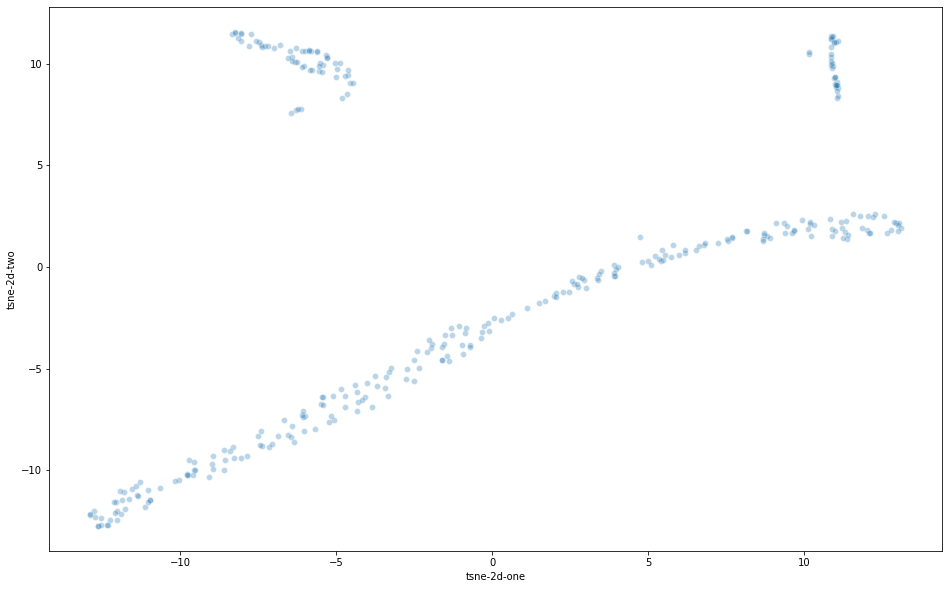

In [0]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
import seaborn as sns
import matplotlib.pyplot as plt
df_subset=pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [0]:
df_subset.head()

,tsne-2d-one,tsne-2d-two
0,-7.159697,-8.854364
1,-7.413728,10.929404
2,5.431224,0.835833
3,-5.332818,10.425863
4,10.124036,1.896241


In [0]:
from sklearn.preprocessing import  RobustScaler
rbs = RobustScaler()
df2 = rbs.fit_transform(df_subset)

km1 = KMeans(n_clusters=3)
km2 = km1.fit(df2)
label = km2.predict(df2)

In [0]:
df_subset['Label']=label

In [0]:
df_cluster0 = df_subset[df_subset['Label']==0]
df_cluster1 = df_subset[df_subset['Label']==1]
df_cluster2 = df_subset[df_subset['Label']==2]

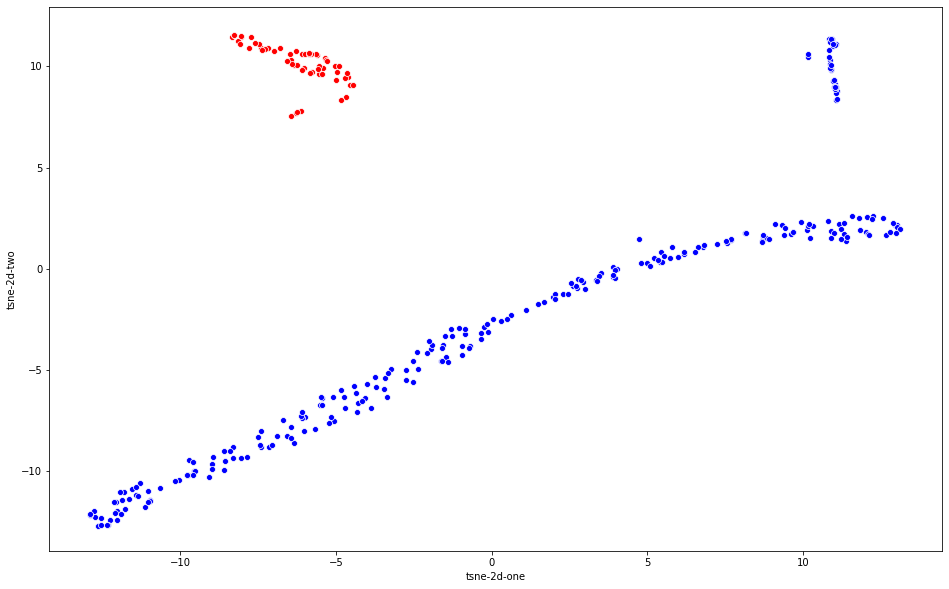

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
cmap = sns.cubehelix_palette(dark=.9, light=.2, as_cmap=True)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    color='blue',
    data=df_cluster0,
    legend="full",
 
)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette="deep",
    color='blue',
    data=df_cluster1,
    legend="full",

)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette="deep",
    data=df_cluster2,
    legend="full",
    color="red",
    sizes=(20,100),

)

In [0]:
dx=pd.read_csv('/content/drive/My Drive/InterIIT/Data.csv')
dx=dx.dropna().reset_index()
dx['Label']=label

In [0]:
for i in range(0,dx.shape[0]):
    if(dx['Remarks'][i] == 'Termination - Poor Performance' or dx['Remarks'][i] == 'Termination - Theft' or dx['Remarks'][i] == 'Absconding' or dx['Remarks'][i] == 'Health Reasons'):
        dx['Remarks'][i] = 'Involuntary'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
x=dx[dx['Label']==2].reset_index()
for i in range(0,x.shape[0]):
    if(x['Remarks'][i] == 'Termination - Poor Performance' or x['Remarks'][i] == 'Termination - Theft' or x['Remarks'][i] == 'Absconding' or x['Remarks'][i] == 'Health Reasons'):
        x['Remarks'][i] = 'Others'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


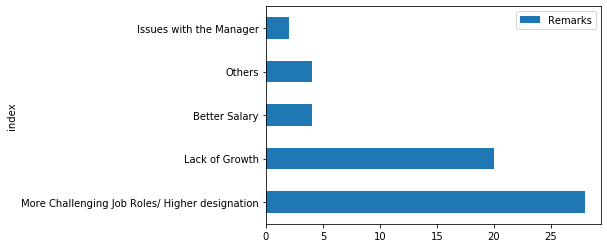

In [0]:
x=x.Remarks.value_counts().reset_index()
import matplotlib.pyplot as plt
x.plot.barh(x='index', y='Remarks')

In [0]:
x=pd.DataFrame()
x['index']=np.array(['More Challenging Job Roles/ Higher designation', 'Lack of Growth',
       'Better Salary', 'Issues with the Manager', 'Others'], dtype=object)

In [0]:
x['Remarks']=np.array([28, 20,  4,  2,  4])

In [0]:
x['Reasons for Attrition']=x['index']
x['Count']=x['Remarks']

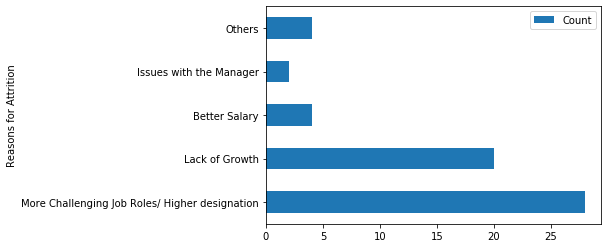

In [0]:
x.plot.barh(x='Reasons for Attrition', y='Count')

In [0]:
cluster_2remark=x['index'].unique()

In [0]:
x=dx[dx['Label']!=2].reset_index()
for i in range(0,x.shape[0]):
    if(x['Remarks'][i] == 'Termination - Poor Performance' or x['Remarks'][i] == 'Termination - Theft' or x['Remarks'][i] == 'Absconding' or x['Remarks'][i] == 'Health Reasons' or x['Remarks'][i] == 'Higher education' or x['Remarks'][i] == 'Reasons not known'):
        x['Remarks'][i] = 'Others'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


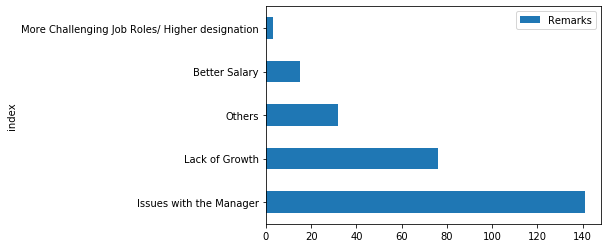

In [0]:
x=x.Remarks.value_counts().reset_index()
import matplotlib.pyplot as plt
x.plot.barh(x='index', y='Remarks')

In [0]:
remark_name=[]
remark_count=[]
for i in cluster_2remark:
  remark_name.append(i)
  remark_count.append(np.array(x[x['index']==i]['Remarks'])[0])
s=pd.DataFrame()
s['Reasons for Attrition']=remark_name
s['Count']=remark_count
s

,Reasons for Attrition,Count
0,More Challenging Job Roles/ Higher designation,3
1,Lack of Growth,76
2,Better Salary,15
3,Issues with the Manager,141
4,Others,32


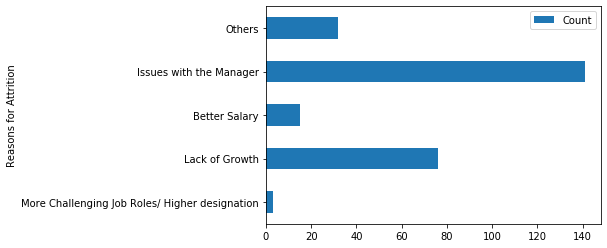

In [0]:
s.plot.barh(x='Reasons for Attrition', y='Count')

In [0]:
dx[dx['Label']==0]

In [0]:
dx[dx['Label']==0].Designation.value_counts()

Sales Executive     111
Sales Executive      19
 Sales Executive      5
Name: Designation, dtype: int64

In [0]:
dx['satisfaction']=pd.Series(satisfaction)
new_df=dx[dx['Label']==1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="Last Rating", y="satisfaction",
    palette=sns.color_palette("hls", 10),
    color='black',
    data=new_df,
    legend="full",
    alpha=0.3
)

In [0]:
income_percent

In [0]:
income_per=pd.cut(np.array(income_percent),3, labels=["bad", "medium", "good"])

In [0]:
pd.Series(income_per)

0         bad
1         bad
2        good
3        good
4        good
        ...  
320      good
321    medium
322    medium
323    medium
324      good
Length: 325, dtype: category
Categories (3, object): [bad < medium < good]

In [0]:
df_subset['income_per']=income_per
df_0 = df_subset[df_subset['income_per']=='bad']
df_1 = df_subset[df_subset['income_per']=='medium']
df_2 = df_subset[df_subset['income_per']=='good']

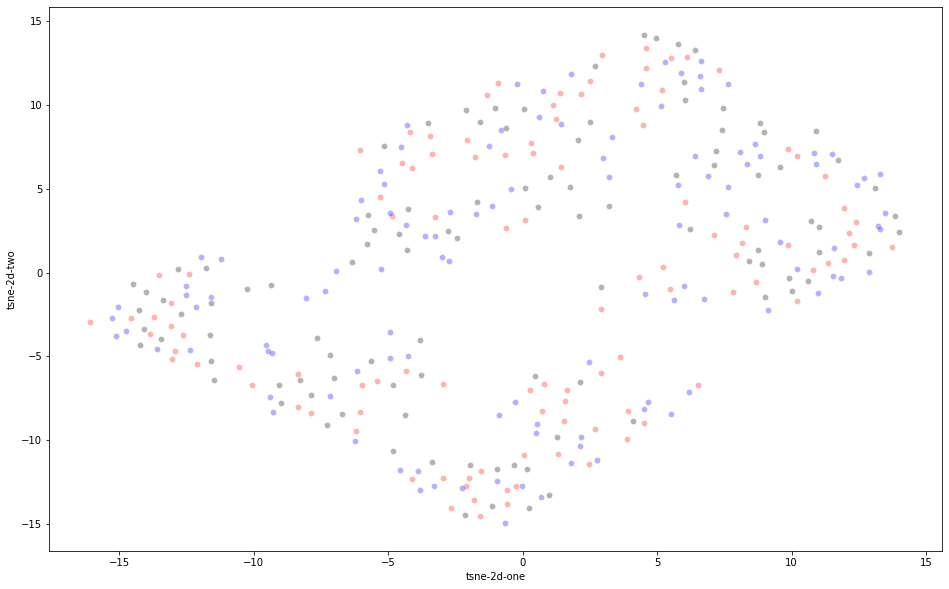

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    color='red',
    data=df_0,
    legend="full",
    alpha=0.3
)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    color='blue',
    data=df_1,
    legend="full",
    alpha=0.3
)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    color='black',
    data=df_2,
    legend="full",
    alpha=0.3
)

In [0]:
company_data['Label']=label
company_data['income_per']=income_per
company_data['satisfaction']=pd.Series(satisfaction)
company_data['Last Rating']=df['Last Rating']

In [0]:
company_data_cluster0=company_data[company_data['Label']==2]
df_0 = company_data_cluster0[company_data_cluster0['income_per']=='bad']
df_1 = company_data_cluster0[company_data_cluster0['income_per']=='medium']
df_2 = company_data_cluster0[company_data_cluster0['income_per']=='good']

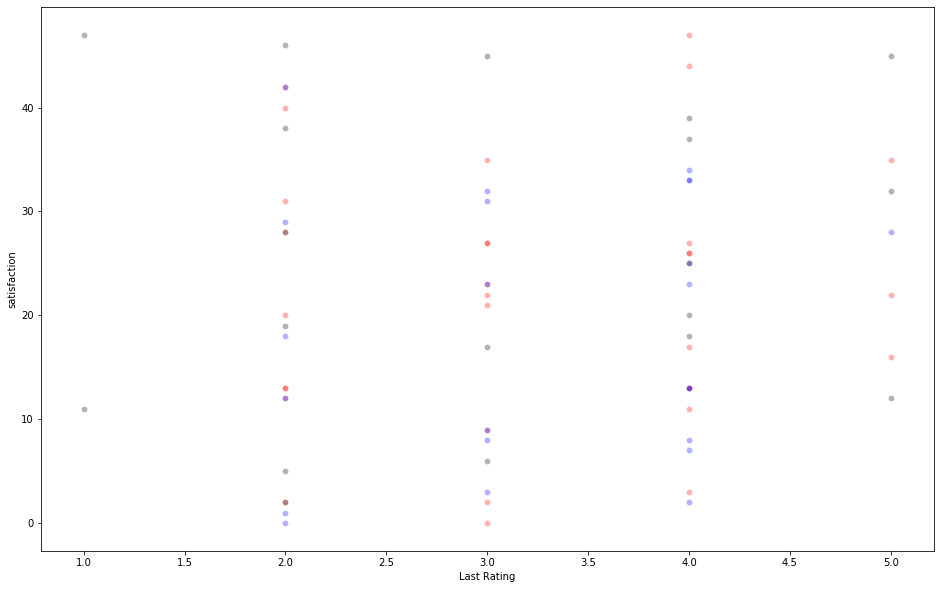

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="Last Rating", y="satisfaction",
    palette=sns.color_palette("hls", 10),
    color='red',
    data=df_0,
    legend="full",
    alpha=0.3
)
sns.scatterplot(
    x="Last Rating", y="satisfaction",
    palette=sns.color_palette("hls", 10),
    color='blue',
    data=df_1,
    legend="full",
    alpha=0.3
)
sns.scatterplot(
    x="Last Rating", y="satisfaction",
    palette=sns.color_palette("hls", 10),
    color='black',
    data=df_2,
    legend="full",
    alpha=0.3
)

In [0]:
df_new=pd.DataFrame()
df_new['Age']=df['Monthly Income']
df_new['satisfaction']=df['satisfaction']
df_new.head()